In [1]:
### Goal: Using the data collected from existing customers, build a model that will help the marketing 
        #team identify potential customers who are relatively more likely to subscribe term deposit
        #and thus increase their hit ratio

In [2]:
# Attribute Information-Bank client data:
    #1. age: Continuous feature
    #2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
    #3. marital: marital status (married, single, divorced)
    #4. education: education level (primary, secondary, tertiary)
    #5. default: has credit in default?
    #6. housing: has housing loan?
    #7. loan: has personal loan?
    #8. balance in account

 #Related to previous contact:
    #9. contact: contact communication type
    #10. month: last contact month of year
    #11. day: last contact day of the month
    #12. duration: last contact duration, in seconds*

 #Other attributes:
    #13. campaign: number of contacts performed during this campaign and for this client
    #14. pdays: number of days that passed by after the client was last contacted from a previous campaign 
         #(-1 tells us the person has not been contacted or contact period is beyond 900 days)
    #15. previous: number of contacts performed before this campaign and for this client
    #16. poutcome: outcome of the previous marketing campaign
    
 #Output variable (desired target):
    #17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [3]:
## D1: Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)

In [4]:
# Loading the libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
import os,sys
from scipy import stats
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image 
from sklearn import tree

In [5]:
# D1_1. Univariate analysis (12 marks)   

In [6]:
 # D1_1a. Univariate analysis – data types and description of the independent attributes
        #which should include (name, meaning, range of values observed, central values
           #(mean and median), standard deviation and quartiles, analysis of the body of
             #distributions / tails, missing values, outliers.

In [7]:
# Loading the dataset
df = pd.read_csv('bank-full.csv')
df.head()
df.tail()

# Insight 1: unknown values observed in columns like job, education, contact, poutcome

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
# Check datatype
df.dtypes

# Insight 2: Data type of various columns like job, marital, education, default, housing, etc. is object . 
             #ideally it should be category

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [9]:
#Converting the columns with an 'object' datatype into categorical variables

for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

# Step taken: To convert columns with 'object' datatype into categorical variables

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [10]:
#data type of columns with an 'object' datatype into categorical variables
df.dtypes

#Step taken : to confirm the change in data type

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [11]:
# Value counts of all categorical columns AND Column contact
   # job, marital, education, default, housing, loan, contact, month,poutcome,target
df['job'].value_counts(normalize=True)
df['marital'].value_counts(normalize=True)
df['education'].value_counts(normalize=True)
df['default'].value_counts(normalize=True)
df['housing'].value_counts(normalize=True)
df['loan'].value_counts(normalize=True)
df['month'].value_counts(normalize=True)
df['poutcome'].value_counts(normalize=True)
print("Number of Entries for which Contact days = unknown are " )
(df['contact'].values == 'unknown').sum()

#Step taken: To check the value counts for selected categorical columns

#Insight3: % values with data values =unknown for the columns: Job (0.6%),education (4%) ,poutcome (81%)
#Insight4: Number of Entries for which Contact days = unknown are 13020
#Insight5: Multiple records with unkown values. this requires data correction

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

no     0.981973
yes    0.018027
Name: default, dtype: float64

yes    0.555838
no     0.444162
Name: housing, dtype: float64

no     0.839774
yes    0.160226
Name: loan, dtype: float64

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

Number of Entries for which Contact days = unknown are 


13020

In [12]:
#Data Balance Check 
df['Target'].value_counts(normalize=True)

#Insight6: Higher level of data imbalance. Only 11.69% clients subscribed to term deposit
#Potential Steps: # Oversampling of minority class can be done using SMOTE for better performance
                  # Synthetic minority over sampling technique should be used to train the model. 
                      #make more samples to train the data set
                  # Request for more data to correct the data imbalance

no     0.883015
yes    0.116985
Name: Target, dtype: float64

In [13]:
# statistical summary-the distribution of the various attribute
df.describe().T

#Insight 7: 
     #7A. Outliers observed for the columns like age, balance, duration, campaign
     #7B. 50% of clients fall in 33-48 years age range
     #7C. 50% of the clients were contacted in 103-319 seconds ( < 5 mins approx)
     #7D. max. 3 number of contacts performed during this campaign for nearly 75% of the clients
        
#Step taken: Box plots plotted for selected columns to look at the outliers
#Potential steps: Higher level of outliers observed for some of the columns requires correction

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [14]:
Count_clients=len(df.loc[df['pdays']==-1])
Count_clients
#Insight8: 36,954 clients has not been contacted or contact period is beyond 900 days. either ways it doesn't appear good. 
           # may be the data quality of this paramter is not right or this data was not captured properly

36954

In [15]:
# Shape
df.shape

(45211, 17)

In [16]:
# Null Values
df.isnull().sum()
# Insight 9:No Null values identified

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

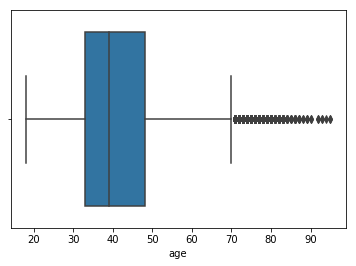

In [17]:
# plotting box plots to identify the outliers for the selected columns: age, balance, duration and campaign 
sns.boxplot(df['age'])

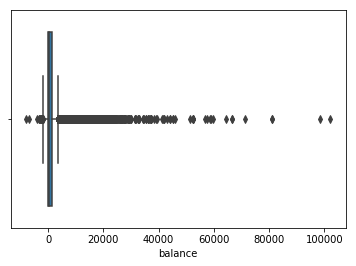

In [18]:
sns.boxplot(df['balance'])

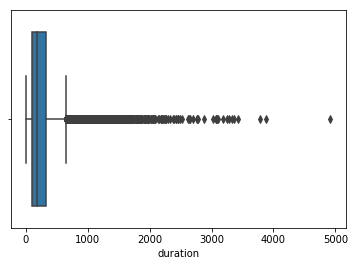

In [19]:
sns.boxplot(df['duration'])

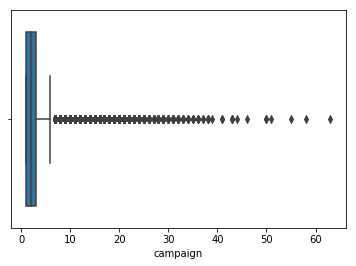

In [20]:
sns.boxplot(df['campaign'])

In [21]:
# D1_1b. Strategies to address the different data challenges such as data pollution, outlier’s 
        #treatment and missing values treatment.
    
          # Data columns with unknown values identified
                 # Refer- In [7] -Insight 1: unknown values observed in columns like job, education, contact, poutcome
                 # Refer -In [11]-
                     #Insight3: % values with data values =unknown for the columns: Job (0.6%),education (4%) ,poutcome (81%)
                     #Insight4: Number of Entries for which Contact days = unknown are 13020 (Missing data)
                     #Insight5: Multiple records with unkown values. this requires data correction
                # Strategy - Unknown values for job column dropped ( 4% data)
        
          # Data-Imbalance identified - Refer In [12]
               #Insight6: Higher level of data imbalance. Only 11.69% clients subscribed to term deposit
                
               #Strategy: # Oversampling of minority class can be done using SMOTE for better performance
                                       # Synthetic minority over sampling technique should be used to train the model. 
                                       #make more samples to train the data set
                                       # Request for more data to correct the data imbalance                                                          
                                               
         # Missing data - no data found missing - Refer In [16]
    
         # Outliers - Box Plots shown for selected columns reflect Outliers - Refer In [17-20]
        
              # Strategy - Random scaler used to normalize data for selected columns and the reasoning - Refer - In [49]
         

In [22]:
# D1_1c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.

# Insights and steps taken are covered in detail in each python cell 

In [23]:
# D1_2. Multivariate analysis (8 marks)

In [24]:
# D1_2a. Bi-variate analysis between the predictor variables and target column. 
      #Comment on your findings in terms of their relationship and degree of relation if any.
      #Visualize the analysis using boxplots and pair plots, histograms or density curves.
      #Select the most appropriate attributes.
    
# Insights and step taken are covered in detail in each python cell

In [25]:
# Bi-Variate Analysis - Job Vs Target in Percentages using crosstab
pd.crosstab(df.job, df.Target).apply(lambda r: (r/r.sum())*100, axis=1)

#Insight 10: Clients with Job Title: retired, student are going to opt for term deposit

Target,no,yes
job,,
management,86.244449,13.755551
technician,88.943004,11.056996
entrepreneur,91.728312,8.271688
blue-collar,92.725031,7.274969
unknown,88.194444,11.805556
retired,77.208481,22.791519
admin.,87.797331,12.202669
services,91.116996,8.883004
self-employed,88.157061,11.842939


In [26]:
# Bi-Variate Analysis - Marital Status Vs Target in Percentages using crosstab
pd.crosstab(df.marital, df.Target).apply(lambda r: (r/r.sum())*100, axis=1)

#Insight 11A: Clients with marital status: single are potentially going to opt for term deposit as compared to married/ divorced

Target,no,yes
marital,,
married,89.876534,10.123466
single,85.050821,14.949179
divorced,88.054542,11.945458


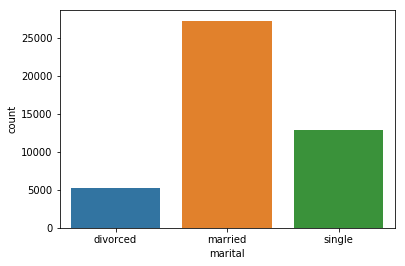

In [27]:
ax = sns.countplot(x="marital", data=df)

#Insight 11B: Higher no. of clients have marital status = married

In [28]:
# Bi-Variate Analysis - Education Vs Target in Percentages using crosstab
pd.crosstab(df.education, df.Target).apply(lambda r: (r/r.sum())*100, axis=1)

#Insight 12A: Clients with education level: tertiary are going to opt for term deposit as compared to others

Target,no,yes
education,,
tertiary,84.993610,15.006390
secondary,89.440565,10.559435
unknown,86.429725,13.570275
primary,91.373522,8.626478


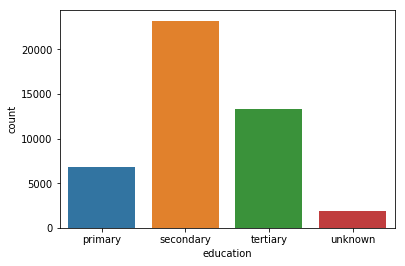

In [29]:
ax = sns.countplot(x="education", data=df)

#Insight 12B: Higher no. of clients have education type as Secondary and Tertiary in the given data set

In [30]:
# Bi-Variate Analysis - housing Vs Target in Percentages using crosstab
pd.crosstab(df.housing, df.Target).apply(lambda r: (r/r.sum())*100, axis=1)

#Insight 13: Clients with no housing loan are potentially going to opt for term deposit as compared to who have housing loan

Target,no,yes
housing,,
yes,92.300040,7.699960
no,83.297645,16.702355


In [31]:
# Bi-Variate Analysis - default Vs Target in Percentages using crosstab
pd.crosstab(df.default, df.Target).apply(lambda r: (r/r.sum())*100, axis=1)

#Insight 14: Clients with status credit in default =no are potentially going to opt for term deposit as compared to others

Target,no,yes
default,,
no,88.203892,11.796108
yes,93.619632,6.380368


In [32]:
# Bi-Variate Analysis - Duration Vs Target in Percentages using crosstab

In [33]:
# Bi-Variate Analysis - loan Vs Target in Percentages using crosstab
pd.crosstab(df.loan, df.Target).apply(lambda r: (r/r.sum())*100, axis=1)

#Insight 15A: Clients with personal loan status= no are potentially going to opt for term deposit as compared to others

Target,no,yes
loan,,
no,87.344273,12.655727
yes,93.318609,6.681391


In [34]:
# Bi-Variate Analysis - Month Vs Target in Percentages using crosstab
pd.crosstab(df.month, df.Target).apply(lambda r: (r/r.sum())*100, axis=1)
#Insight 15C: Clients who were contacted in month - Oct, Dec, Mar, Sep show higher % of conversions for term deposit

Target,no,yes
month,,
may,93.280546,6.719454
jun,89.777195,10.222805
jul,90.906454,9.093546
aug,88.986714,11.013286
oct,56.233062,43.766938
nov,89.848866,10.151134
dec,53.271028,46.728972
jan,89.878831,10.121169
feb,83.352208,16.647792


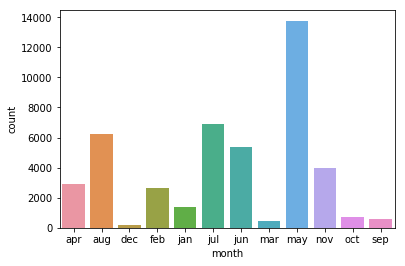

In [35]:
ax = sns.countplot(x="month", data=df)
#Insight 15D: Higher no. of data values are for contact month as may, jul, jun and aug

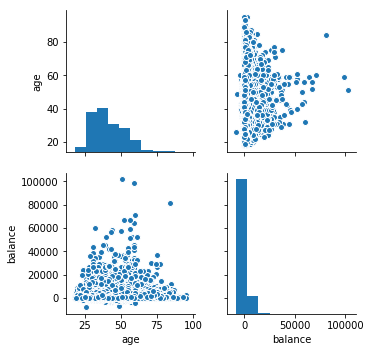

In [36]:
sns.pairplot(df[['age','balance']])

In [37]:
df.corr()
#Insight 16: Weak correlation observed among the independant variables

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [38]:
# D1_2b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

# Please refer to insights covered for each plot in every cell refering to a particular plot

In [39]:
## D2: Deliverable – 2 (Prepare the data for analytics) – (10)

In [40]:
#D2_1. Ensure the attribute types are correct. If not, take appropriate actions. 

# Steps Taken:Attribute types already corrected- Refer- Out[24] & Out[25]

In [41]:
#D2_2. Get the data model ready.

In [42]:
# printing the unique data label list for column- job,education,month,poutcome,housing,default,Target

print(df.job.value_counts())
print(df.education.value_counts())
print(df.month.value_counts())
print(df.poutcome.value_counts())
print(df.housing.value_counts())
print(df.default.value_counts())
print(df.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
no     39922
yes     5289
Name: Target, dtype: int64


In [43]:
#D2_3. Transform the data i.e. scale / normalize if required

In [44]:
# Step taken: to replace the unique data labels with integers to transform the data (scale)
replaceStruct = {                
                "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": -1},
                "poutcome":     {"failure": 1, "other": 2 ,"success": 3 ,"unknown": -1},
                "housing":  {"no": 0, "yes": 1 },
                "default": {"no": 0, "yes": 1 }, 
                "Target":  {"no": 0, "yes": 1 } 
                    }

In [45]:
# Selected columns will be hot encoded as we don't want to assign integers like 1,2,3,4 to the unique values to avoid bias
oneHotCols=["marital","loan","contact","job","month"]

In [46]:
df1=df.replace(replaceStruct)
df2=pd.get_dummies(df1, columns=oneHotCols)
df2.head()

,age,education,default,balance,housing,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,1,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,2,0,29,1,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,0,2,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,-1,0,1506,1,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,-1,0,1,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
# addressing unknown values for column : education
df2[df2["education"]==-1] # to look at unknown values for education column

# Step taken : dropping the values as this is 4% of the values in the entire data set (Refer In [78])
df2 = df2[df2["education"]!=-1]
df2.head()

,age,education,default,balance,housing,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3,47,-1,0,1506,1,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,-1,0,1,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
13,58,-1,0,71,1,5,71,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
16,45,-1,0,13,1,5,98,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
42,60,-1,0,104,1,5,22,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
44,58,-1,0,96,1,5,616,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
57,47,-1,0,306,1,5,13,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
58,40,-1,0,24,1,5,185,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
64,49,-1,0,154,1,5,357,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
93,60,-1,0,54,1,5,221,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


,age,education,default,balance,housing,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,1,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,2,0,29,1,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,0,2,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
5,35,3,0,231,1,5,139,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
6,28,3,0,447,1,5,217,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
# To look at the data representation for poutcome column
# reference unique value list for "poutcome" column : "failure": 1, "other": 2 ,"success": 3 ,"unknown": -1

pd.crosstab(df2.poutcome, df2.Target).apply(lambda r: (r/r.sum())*100, axis=1)

# Insight: 64.54% of clients opted for term deposit where the marketing campaign was successful

df2['poutcome'].value_counts(normalize=True)

# Insight: 81% data values for poutcome are unknown. 
           # It won't be right to replace these values with mode as the minority class  is under represented 

Target,0,1
poutcome,,
-1,90.882145,9.117855
1,87.510584,12.489416
2,83.436620,16.563380
3,35.454545,64.545455


-1    0.817110
 1    0.108963
 2    0.040942
 3    0.032984
Name: poutcome, dtype: float64

In [49]:
#D2_3. Transform the data - normalize 

# Insight 17: 
     #17 A: Balance column values has lot of higher values and large no. of ouliers
     #17 B:This will lead to difficulties to visualize the data and, more importantly, 
        # they can degrade the predictive performance of many machine learning algorithms
     #17 C: Unscaled data can also slow down /even prevent the convergence of many gradient-based estimators (gradient boosting)
    
# Step Taken: To normalize balance column values - balance, campaign and duration
     # Using Robust scaler to enable non-linear transformations and map data to a normal distribution to stabilize variance 
        # and minimize skewness.
        
from sklearn.preprocessing import RobustScaler
X = df2[['balance','campaign','duration']]
transformer = RobustScaler().fit(X)
transformer
RobustScaler()
df2[['balance','campaign','duration']]=transformer.transform(X)


RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [50]:
df2.head()
#Columns with outliers transformed

,age,education,default,balance,housing,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,1.264881,1,5,0.376744,-0.5,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,2,0,-0.308036,1,5,-0.134884,-0.5,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,0,-0.328125,1,5,-0.483721,-0.5,-1,0,...,0,0,0,0,0,0,1,0,0,0
5,35,3,0,-0.157738,1,5,-0.190698,-0.5,-1,0,...,0,0,0,0,0,0,1,0,0,0
6,28,3,0,0.002976,1,5,0.172093,-0.5,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
#D2_4. Create the training set and test set in ratio of 70:30

In [52]:
# Split data
X = df2.drop("Target" , axis=1)
y = df2.pop("Target")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [53]:
## D3: Deliverable – 3 (create the ensemble model) – (30)

In [54]:
#D3_1. First create models using Logistic Regression and Decision Tree algorithm. Note the
     #model performance by using different matrices. Use confusion matrix to evaluate
     #class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the
     #model. (10 marks)

In [55]:
#Build the logistic Regression model

import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.243355
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                  Pseudo R-squared:       0.325     
Dependent Variable:       Target                 AIC:                    14848.1948
Date:                     2020-07-29 20:26       BIC:                    15172.6925
No. Observations:         30347                  Log-Likelihood:         -7385.1   
Df Model:                 38                     LL-Null:                -10941.   
Df Residuals:             30308                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           8.0000                                                   
-----------------------------------------------------------------------------------
                   Coef.    Std.Err.      z     P>|z|      [0.025         0.975]   
-----------------------------------------------------------------------------------
const             -1.0959          nan      nan    nan            nan           nan
age               -0.0020       0.0027  -0.7554 0.4500        -0.0073        0.0033
education          0.1815       0.0438   4.1427 0.0000         0.0956        0.2673
default           -0.0490       0.2041  -0.2400 0.8103        -0.4490        0.3510
balance            0.0233       0.0086   2.7212 0.0065         0.0065        0.0401
housing           -0.6730       0.0525 -12.8093 0.0000        -0.7759       -0.5700
day                0.0101       0.0030   3.3531 0.0008         0.0042        0.0160
duration           0.9087       0.0169  53.7178 0.0000         0.8755        0.9418
campaign          -0.1474       0.0234  -6.3050 0.0000        -0.1932       -0.1016
pdays             -0.0032       0.0003 -10.2168 0.0000        -0.0038       -0.0026
previous          -0.0115       0.0120  -0.9567 0.3387        -0.0351        0.0121
poutcome           0.5992       0.0266  22.5439 0.0000         0.5471        0.6513
marital_divorced  -0.3031          nan      nan    nan            nan           nan
marital_married   -0.5660          nan      nan    nan            nan           nan
marital_single    -0.2267          nan      nan    nan            nan           nan
loan_no           -0.3250          nan      nan    nan            nan           nan
loan_yes          -0.7709  358519.5565  -0.0000 1.0000   -702686.1894   702684.6475
contact_cellular   0.1632 1052872.7348   0.0000 1.0000  -2063592.4772  2063592.8037
contact_telephone  0.0069 1052872.7348   0.0000 1.0000  -2063592.6335  2063592.6474
contact_unknown   -1.2661 1052872.7348  -0.0000 1.0000  -2063593.9066  2063591.3744
job_admin.         0.1136 5636911.0678   0.0000 1.0000 -11048142.5634 11048142.7906
job_blue-collar   -0.1339 5636911.0678  -0.0000 1.0000 -11048142.8109 11048142.5432
job_entrepreneur  -0.3152 5636911.0678  -0.0000 1.0000 -11048142.9923 11048142.3618
job_housemaid     -0.4499 5636911.0678  -0.0000 1.0000 -11048143.1270 11048142.2271
job_management    -0.0701 5636911.0678  -0.0000 1.0000 -11048142.7472 11048142.6069
job_retired        0.4376 5636911.0678   0.0000 1.0000 -11048142.2395 11048143.1146
job_self-employed -0.1839 5636911.0678  -0.0000 1.0000 -11048142.8610 11048142.4931
job_services      -0.1522 5636911.0678  -0.0000 1.0000 -11048142.8292 11048142.5248
job_student        0.4238 5636911.0678   0.0000 1.0000 -11048142.2532 11048143.1009
job_technician    -0.0622 5636911.0678  -0.0000 1.0000 -11048142.7392 11048142.6149
job_unemployed    -0.1019 5636911.0678  -0.0000 1.0000 -11048142.7789 11048142.5752
job_unknown       -0.6016 5636911.0678  -0.0000 1.0000 -11048143.2786 11048142.0754
month_apr         -0.1548 7268265.4289  -0.0000 1.0000 -14245538.6256 14245538.3160
month_aug         -0.7404 7268265.4289  -0.0000 1.0000 -14245539.2112 14245537.7304
month_dec          0.5686 7268265.4289

In [56]:
#Summary of logistic regression
#Library already imported

stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df2)
print(lg.summary())

# Insight -Education, housing , poutcome, duration columns significant as reflected by the p -values

                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                30347
Model:                          Logit   Df Residuals:                    30308
Method:                           MLE   Df Model:                           38
Date:                Wed, 29 Jul 2020   Pseudo R-squ.:                  0.3250
Time:                        20:26:28   Log-Likelihood:                -7385.1
converged:                       True   LL-Null:                       -10941.
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0959        nan        nan        nan         nan         nan
age                  -0.0020      0.003     -0.755      0.450      -0.007       0.003
education             0.

In [57]:
# Odds Ratio, probability
# create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [58]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
duration,0.91,2.48,0.71,0.00
poutcome,0.60,1.82,0.65,0.00
education,0.18,1.20,0.55,0.00
balance,0.02,1.02,0.51,0.01
day,0.01,1.01,0.50,0.00
pdays,-0.00,1.00,0.50,0.00
campaign,-0.15,0.86,0.46,0.00
housing,-0.67,0.51,0.34,0.00


In [59]:
y_pred_df = pd.DataFrame()

#y_pred_df['actual'] = y_test.values[:,0]
y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ).values )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.7 as values at and above 0.7 probability is converted to '1'

y_pred_df[0:5] # data frame representing term deposit-actual value, predicted probability and predicted value at 0.7 threshold 

Count_Prob_actual=len(y_pred_df.loc[y_pred_df['actual']==1])
             # no. of customers actually opted for term deposit in the test data
    
Count_Prob_predicted=len(y_pred_df.loc[y_pred_df['predicted']==1])
             # no. of customers predicted to opt for term deposit by test model 
    
Count_Prob_actual, Count_Prob_predicted

,actual,predicted_prob,predicted
40979,1,0.09,0
22024,0,0.04,0
42842,0,0.32,0
16761,0,0.08,0
41638,1,0.40,0


(1492, 600)

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,cohen_kappa_score
confusion_matrix(y_pred_df['actual'], y_pred_df['predicted'])

resultsDf = pd.DataFrame({'Method':['Logistics Regression'], 
                          'Accuracy': accuracy_score(y_pred_df['actual'], y_pred_df['predicted']), 
                          'Recall':recall_score(y_pred_df['actual'], y_pred_df['predicted']),
                        'Precision':precision_score(y_pred_df['actual'], y_pred_df['predicted']),
                         'f1_score':f1_score(y_pred_df['actual'], y_pred_df['predicted']),
                         'ROC AUC Score':roc_auc_score(y_pred_df['actual'], y_pred_df['predicted'])})
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

array([[11312,   203],
       [ 1095,   397]], dtype=int64)

,Method,Accuracy,Recall,Precision,f1_score,ROC AUC Score
0,Logistics Regression,0.90,0.27,0.66,0.38,0.62


In [61]:
# Build Decision tree model
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [62]:
# Scoring our decision tree
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8790651187821942


In [63]:
# Reducing overfitting for decision tree ( Regularisation)
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

0.9013741061719445
0.9038210194510649


                   Imp
age               0.00
education         0.00
default           0.00
balance           0.00
housing           0.00
day               0.00
duration          0.65
campaign          0.00
pdays             0.00
previous          0.00
poutcome          0.35
marital_divorced  0.00
marital_married   0.00
marital_single    0.00
loan_no           0.00
loan_yes          0.00
contact_cellular  0.00
contact_telephone 0.00
contact_unknown   0.00
job_admin.        0.00
job_blue-collar   0.00
job_entrepreneur  0.00
job_housemaid     0.00
job_management    0.00
job_retired       0.00
job_self-employed 0.00
job_services      0.00
job_student       0.00
job_technician    0.00
job_unemployed    0.00
job_unknown       0.00
month_apr         0.00
month_aug         0.00
month_dec         0.00
month_feb         0.00
month_jan         0.00
month_jul         0.00
month_jun         0.00
month_mar         0.00
month_may         0.00
month_nov         0.00
month_oct         0.00
month_sep  

<Figure size 864x864 with 0 Axes>

Text(0.5,1,'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x576e080>,
 <a list of 20 Text xticklabel objects>)

(-1, 20)

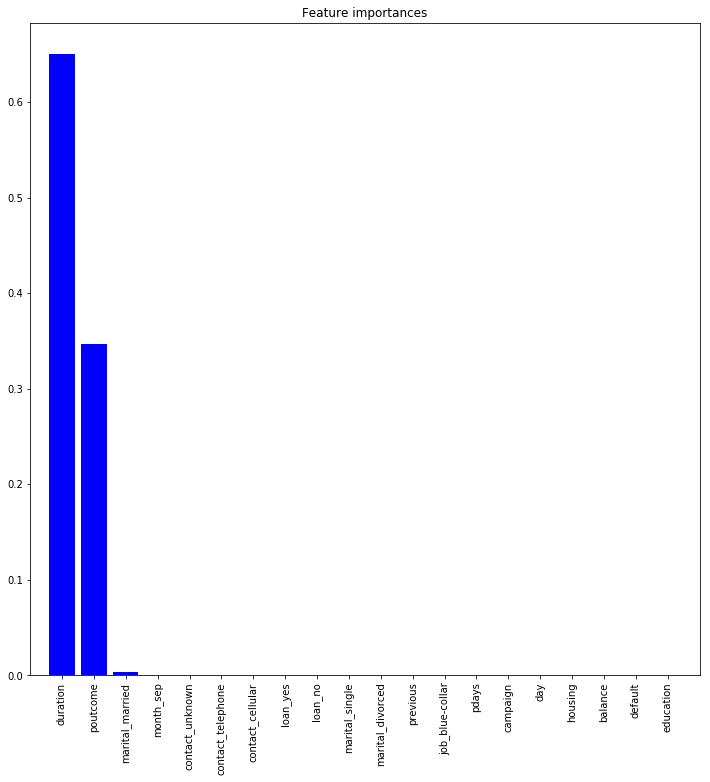

In [80]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

feat_names = X_train.columns.values
#print(feat_names)
## plot the importances ##
importances =dTreeR.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="b", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

0.9038210194510649


<Figure size 504x360 with 0 Axes>

,Method,Accuracy,Recall,Precision,f1_score,ROC AUC Score
0,Logistics Regression,0.90,0.27,0.66,0.38,0.62
0,Decision Tree Regularised,0.90,0.34,0.66,0.45,0.66


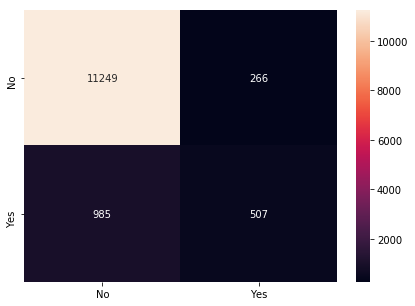

In [65]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

from sklearn.metrics import f1_score,precision_score,recall_score

tempResultsDf = pd.DataFrame({'Method':['Decision Tree Regularised'], 
                          'Accuracy': accuracy_score(y_test, y_predict), 
                          'Recall':recall_score(y_test, y_predict),
                        'Precision':precision_score(y_test, y_predict),
                         'f1_score':f1_score(y_test, y_predict),
                             'ROC AUC Score':roc_auc_score(y_test, y_predict)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

In [66]:
#D3_2. Build the ensemble models (Bagging and Boosting) and note the model performance
     #by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)

In [79]:
# Ensemble technique - Bagging
from sklearn.ensemble import BaggingClassifier

bgcl1 = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)

bgcl1 = bgcl1.fit(X_train, y_train)


0.9055892980702699


<Figure size 504x360 with 0 Axes>

,Method,Accuracy,Recall,Precision,f1_score,ROC AUC Score
0,Logistics Regression,0.90,0.27,0.66,0.38,0.62
0,Decision Tree Regularised,0.90,0.34,0.66,0.45,0.66
0,Bagging,0.91,0.48,0.61,0.54,0.72


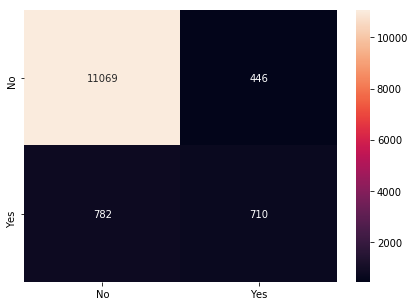

In [68]:
y_predict = bgcl1.predict(X_test)

print(bgcl1.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 
                          'Accuracy': accuracy_score(y_test, y_predict), 
                          'Recall':recall_score(y_test, y_predict),
                        'Precision':precision_score(y_test, y_predict),
                         'f1_score':f1_score(y_test, y_predict),
                             'ROC AUC Score':roc_auc_score(y_test, y_predict)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

In [69]:
# Ensemble Techniques : Boosting using adaptive boosting

<Figure size 864x864 with 0 Axes>

Text(0.5,1,'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x1600a5f8>,
 <a list of 20 Text xticklabel objects>)

(-1, 20)

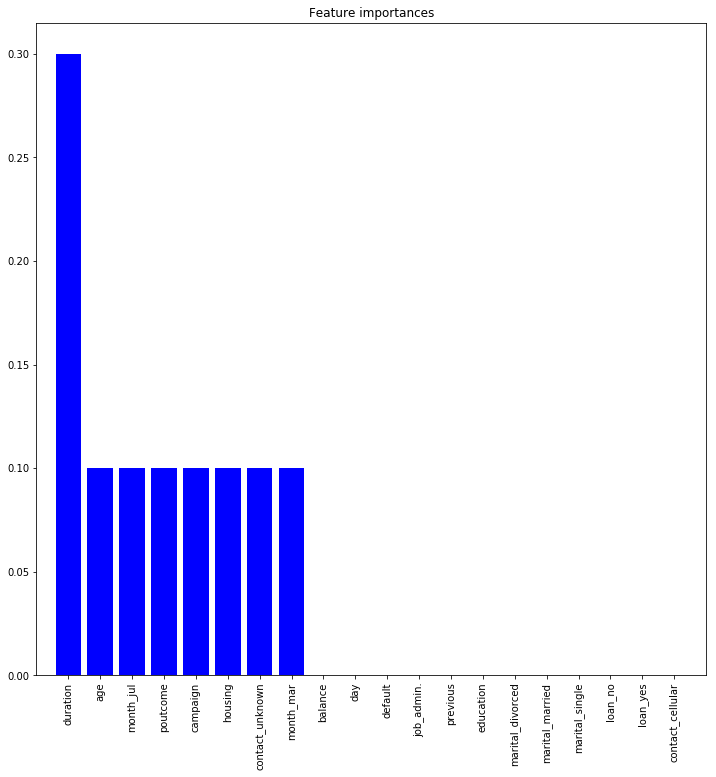

In [77]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl1 = abcl.fit(X_train, y_train)
feat_names = X_train.columns.values
#print(feat_names)
## plot the importances ##
importances = abcl1.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="b", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

0.8982855385561621


<Figure size 504x360 with 0 Axes>

,Method,Accuracy,Recall,Precision,f1_score,ROC AUC Score
0,Logistics Regression,0.90,0.27,0.66,0.38,0.62
0,Decision Tree Regularised,0.90,0.34,0.66,0.45,0.66
0,Bagging,0.91,0.48,0.61,0.54,0.72
0,adaptive boosting,0.90,0.37,0.59,0.46,0.67


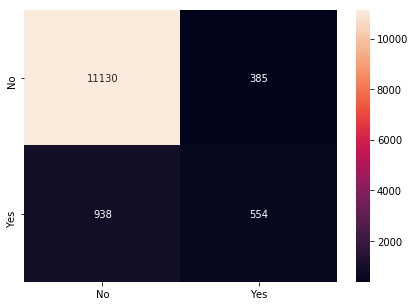

In [71]:
y_predict = abcl1.predict(X_test)
print(abcl1.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['adaptive boosting'], 
                          'Accuracy': accuracy_score(y_test, y_predict), 
                          'Recall':recall_score(y_test, y_predict),
                        'Precision':precision_score(y_test, y_predict),
                         'f1_score':f1_score(y_test, y_predict),
                             'ROC AUC Score':roc_auc_score(y_test, y_predict)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

In [72]:
# Ensemble Techniques : Boosting using gradient boosting

<Figure size 864x864 with 0 Axes>

Text(0.5,1,'Feature importances')

<BarContainer object of 20 artists>

([<matplotlib.axis.XTick at 0x15ffd780>,
 <a list of 20 Text xticklabel objects>)

(-1, 20)

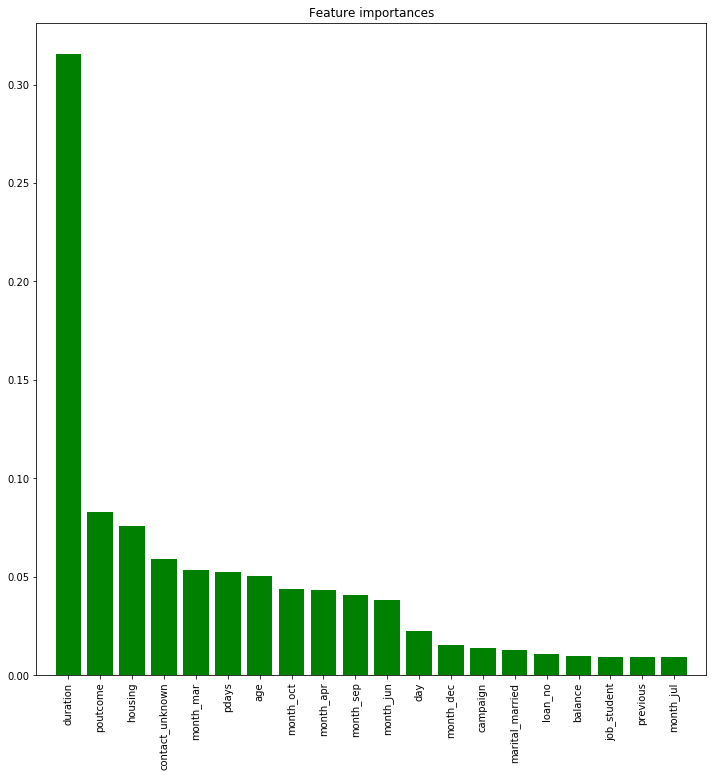

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
feat_names = X_train.columns.values
#print(feat_names)
## plot the importances ##
importances = gbcl.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="g", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

0.9077419850849543


<Figure size 504x360 with 0 Axes>

,Method,Accuracy,Recall,Precision,f1_score,ROC AUC Score
0,Logistics Regression,0.90,0.27,0.66,0.38,0.62
0,Decision Tree Regularised,0.90,0.34,0.66,0.45,0.66
0,Bagging,0.91,0.48,0.61,0.54,0.72
0,adaptive boosting,0.90,0.37,0.59,0.46,0.67
0,gradient boosting,0.91,0.37,0.68,0.48,0.67


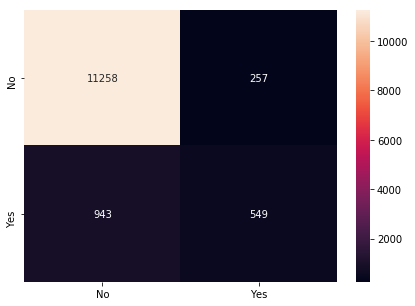

In [76]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

tempResultsDf = pd.DataFrame({'Method':['gradient boosting'], 
                          'Accuracy': accuracy_score(y_test, y_predict), 
                          'Recall':recall_score(y_test, y_predict),
                        'Precision':precision_score(y_test, y_predict),
                         'f1_score':f1_score(y_test, y_predict),
                             'ROC AUC Score':roc_auc_score(y_test, y_predict)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','Recall','Precision','f1_score','ROC AUC Score']]
resultsDf

In [ ]:
#D3_3.Make a DataFrame to compare models and their metrics. Give conclusion regarding
     #the best algorithm and your reason behind it. (5 marks)

In [ ]:
# All of the model results are compiled iteratively in resultsDf 
      #  Refer: Out [60] - Logistics Regression
      #  Refer: Out [65] - Decision Tree Regularised
      #  Refer: Out [68] - Bagging
      #  Refer: Out [70] - Adaptive Boosting
      #  Refer: Out [73] - Gradient Boosting

#The given data set is imabalanced . 
     # Refer: Out [11] - Insight6: Higher level of data imbalance. Only 11.69% clients subscribed to term deposit 
# Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous
# It isn't enough to use some single measure as sensitivity, specificity, precision, PPV, NPV, etc.
# In this case, other alternative evaluation metrics can be applied such ascombination of below metrics:
     # Precision/Specificity: how many selected instances are relevant.
     # Recall/Sensitivity: how many relevant instances are selected.
     # F1 score: harmonic mean of precision and recall.
     # AUC: relation between true-positive rate and false positive rate.
# Precision helps us understand how useful the results are. Recall helps us understand how complete the results are.
      # as F1 score is harmonic mean of recall and precision. Considering combination of F1 score and AOC score will be good
      # Considering that crietria Bagging looks like the best model, followed by gradient boosting and adaptive boosting.
        
# Hyperparameter tuning and regularization can be done to improve the predictions
# Cross-validation to check for hyperparameters such as number of estimators to see the best hyperparameters 
    # within a given set of models
